# Nelinearni sistemi

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

## Hemoglobin

In [2]:
# Učitavanje podataka
data_hg = pd.read_csv("Occupancy_data_hemoglobin_clear.csv", header=None)

X = data_hg.iloc[:, 0].values
y = data_hg.iloc[:, 1].values

In [3]:
# Definisanje Hilove funkcije i formule za SSE
def hill_function(X, Kd, n):
    return (X / Kd)**n / (1 + (X / Kd)**n)

def sse(y_obs, y_pred):
    return np.sum((y_obs - y_pred)**2)

In [4]:
# Fitovanje krive
params, covariance = curve_fit(hill_function, X, y)

Kd_fit, n_fit = params

X_smooth = np.linspace(min(X), max(X), 300)
y_fit = hill_function(X_smooth, Kd_fit, n_fit)

# Računanje SSE
y_pred = hill_function(X, Kd_fit, n_fit)
SSE = sse(y, y_pred)

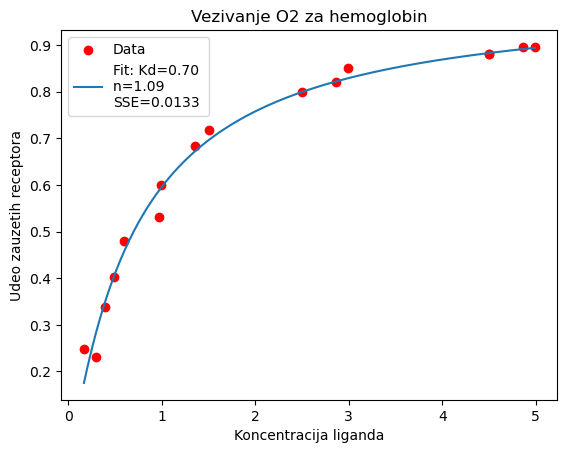

In [10]:
# Kreiranje grafika (podaci + fit)
plt.scatter(X, y, label="Data", color="red")
plt.plot(X_smooth, y_fit, label=f"Fit: Kd={Kd_fit:.2f} \nn={n_fit:.2f} \nSSE={SSE:.4f}")
plt.title("Vezivanje O2 za hemoglobin")
plt.xlabel("Koncentracija liganda")
plt.ylabel("Udeo zauzetih receptora")
plt.legend()
plt.show()

### **1. Poznajući biološke definicije parametra Hilove funkcije, predložite granice opsega u kojima bi imalo smisla varirati njihove vrednosti.**

Kd svakako ne može biti manje od 0, a teorijski nema gornju granicu, mada postoje fiziološka ograničenja u bilo kom biološkom sistemu. Vrednosti blizu nule podrazumevaju veoma visok afinitet vezivanja, a velike vrednosti nizak afinitet. Hilova konstanta (n) manja od 1 bi značila negativnu kooperativnost, a iako bi matematički mogla imati beskonačno visoku vrednost, u biološkim sistemima je takođe ograničena (za hemoglobin je manja od 4).

### **2. Koja je vrednost Hilove konstante dobijena fitovanjem? Da li ste, na osnovu onoga što znate o vezivanju kiseonika za hemoglobin, očekivali ovu vrednost? Kako je objašnjavate?**

Dobijena je vrednost 3, što ima smisla i ukazuje na visoku kooperativnost pri vezivanju O2 za hemoglobin.

### **3. Koja je biofizička interpretacija drugog parametra u fitu?**

Kd se odnosi na afinitet vezivanja O2 za hemoglobin. Matematički predstavlja koncentraciju liganda pri kojoj je zauzeto 50% mesta vezivanja.


---

## Mioglobin

In [6]:
# Učitavanje podataka
data_mg = pd.read_csv("Occupancy_data_Myoglobin_clear.csv", header=None)

X = data_mg.iloc[:, 0].values
y = data_mg.iloc[:, 1].values

In [7]:
# Fitovanje krive
params, covariance = curve_fit(hill_function, X, y)

Kd_fit, n_fit = params

X_smooth = np.linspace(min(X), max(X), 300)
y_fit = hill_function(X_smooth, Kd_fit, n_fit)

# Računanje SSE
y_pred = hill_function(X, Kd_fit, n_fit)
SSE = sse(y, y_pred)

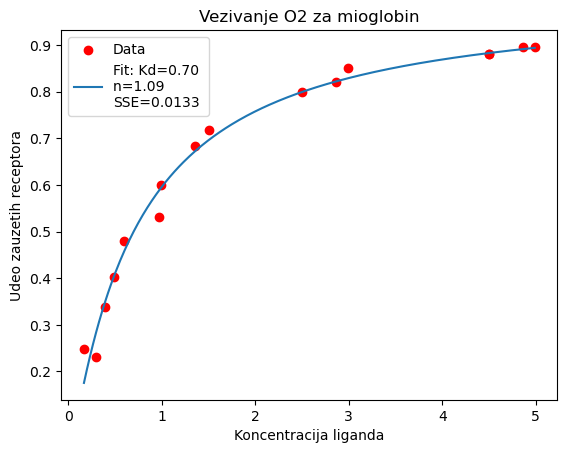

In [9]:
# Kreiranje grafika
plt.scatter(X, y, label="Data", color="red")
plt.plot(X_smooth, y_fit, label=f"Fit: Kd={Kd_fit:.2f} \nn={n_fit:.2f} \nSSE={SSE:.4f}")
plt.title("Vezivanje O2 za mioglobin")
plt.xlabel("Koncentracija liganda")
plt.ylabel("Udeo zauzetih receptora")
plt.legend()
plt.show()

### **1. Koja je vrednost Hilove konstante dobijena fitovanjem? Da li ste, na osnovu onoga što znate o vezivanju kiseonika za mioglobin, očekivali ovakvu vrednost? Kako je objašnjavate?**

Vrednost je 1,08. Kako mioglobin vezuje samo jedan molekul O2, kriva raste mnogo postepenije (hiperbolično) - nema kooperativnosti.

### **2. Da li udeo vezanih receptora nelinearno zavisi od koncentracije kiseonika u slučaju hemoglobila ili u slučaju mioglobina? Šta je uzrok ove nelinearnosti?**

Nelinearnost je izražena kod hemoglobina, upravo usled prisustva kooperativnosti pri vezivanju O2.

### **3. Možete li da povežete razlike u biofizičkim mehanizmima kojima hemoglobin i mioglobin vezuju (i otpuštaju) molekule kiseonika sa razlikama u njihovoj funkciji u organizmu?**

Hemoglobin ima ulogu u transportu kiseonika po celom telu, pa je brzo vezivanje i otpuštanje od ključnog značaja u uskom opsegu fizioloških vrednosti koncentracija (parcijalnih pritisaka) kiseonika. To ne važi za mioglobin, koji služi kao izvesno skladište kiseonika u mišićima.